In [2]:
# Requerido: tensorflow >= 2.6 (usar Colab o entorno local)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
# 1) Descargar dataset (drop-in replacement de MNIST)
# Devuelve (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
# 2) Inspección rápida
print("Shapes:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# Clases: 0..9 (T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot)
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


Shapes: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
# 3) Preprocesamiento:
# - Normalizar a [0,1]
# - Expandir canal (28,28) -> (28,28,1) para Conv2D
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

In [6]:
# Construcción del modelo (CNN simple y robusto)
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(28,28,1)),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

model = build_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#Compilación: optimizer, función de pérdida y métricas
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # etiquetas enteras 0..9
    metrics=['accuracy']
)

In [8]:
#Callbacks: early stopping y checkpoint
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('best_fashionmnist.h5', save_best_only=True, monitor='val_loss')
]

In [9]:
# 7) Entrenamiento
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=25,
    batch_size=64,
    callbacks=callbacks,
    verbose=2
)

Epoch 1/25


844/844 - 16s - 19ms/step - accuracy: 0.8116 - loss: 0.5237 - val_accuracy: 0.8748 - val_loss: 0.3369
Epoch 2/25


844/844 - 13s - 15ms/step - accuracy: 0.8780 - loss: 0.3444 - val_accuracy: 0.8967 - val_loss: 0.2803
Epoch 3/25


844/844 - 13s - 15ms/step - accuracy: 0.8936 - loss: 0.2964 - val_accuracy: 0.9040 - val_loss: 0.2576
Epoch 4/25


844/844 - 12s - 15ms/step - accuracy: 0.9032 - loss: 0.2645 - val_accuracy: 0.9130 - val_loss: 0.2385
Epoch 5/25


844/844 - 12s - 15ms/step - accuracy: 0.9119 - loss: 0.2409 - val_accuracy: 0.9133 - val_loss: 0.2366
Epoch 6/25


844/844 - 13s - 15ms/step - accuracy: 0.9206 - loss: 0.2161 - val_accuracy: 0.9160 - val_loss: 0.2282
Epoch 7/25


844/844 - 12s - 14ms/step - accuracy: 0.9257 - loss: 0.2023 - val_accuracy: 0.9153 - val_loss: 0.2243
Epoch 8/25


844/844 - 12s - 14ms/step - accuracy: 0.9303 - loss: 0.1878 - val_accuracy: 0.9197 - val_loss: 0.2239
Epoch 9/25


844/844 - 21s - 25ms/step - accuracy: 0.9362 - loss: 0.1710 - val_accuracy: 0.9227 - val_loss: 0.2158
Epoch 10/25
844/844 - 11s - 14ms/step - accuracy: 0.9404 - loss: 0.1596 - val_accuracy: 0.9272 - val_loss: 0.2173
Epoch 11/25
844/844 - 11s - 13ms/step - accuracy: 0.9446 - loss: 0.1472 - val_accuracy: 0.9208 - val_loss: 0.2374
Epoch 12/25
844/844 - 11s - 13ms/step - accuracy: 0.9483 - loss: 0.1376 - val_accuracy: 0.9250 - val_loss: 0.2324
Epoch 13/25
844/844 - 11s - 13ms/step - accuracy: 0.9524 - loss: 0.1264 - val_accuracy: 0.9253 - val_loss: 0.2391


Test accuracy: 0.9188, Test loss: 0.2330
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top     0.8549    0.8900    0.8721      1000
     Trouser     0.9910    0.9880    0.9895      1000
    Pullover     0.8507    0.9000    0.8746      1000
       Dress     0.9264    0.9190    0.9227      1000
        Coat     0.8522    0.8820    0.8668      1000
      Sandal     0.9939    0.9730    0.9833      1000
       Shirt     0.8141    0.7050    0.7556      1000
     Sneaker     0.9418    0.9870    0.9639      1000
         Bag     0.9791    0.9830    0.9810      1000
  Ankle boot     0.9806    0.9610    0.9707      1000

    accuracy                         0.9188     10000
   macro avg     0.9185    0.9188    0.9180     10000
weighted avg     0.9185    0.9188    0.9180     10000



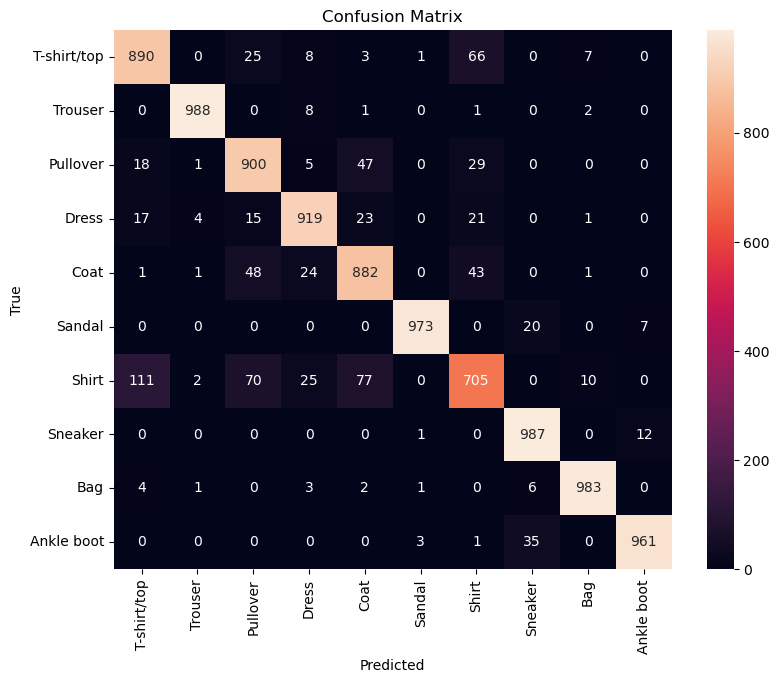

Número de errores: 812


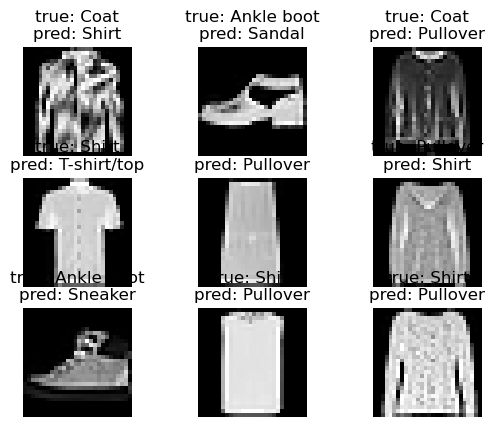

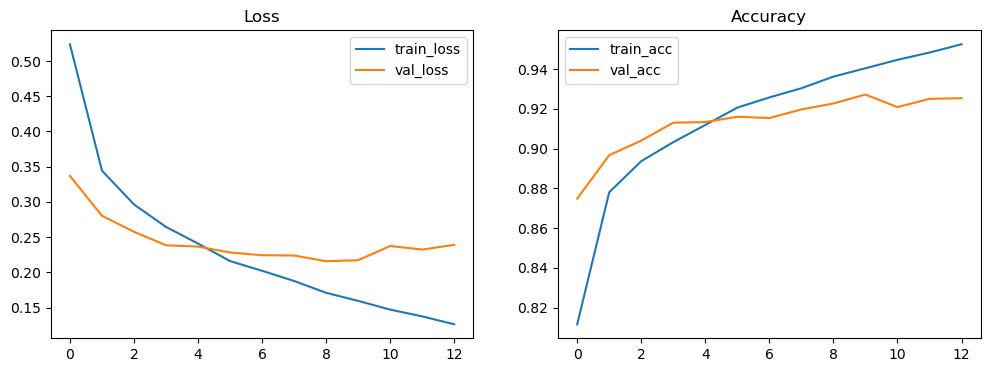

In [11]:
# 8) Evaluación en test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

# 9) Matriz de confusión y reporte por clase
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=class_names, digits=4))

# Visualizar matriz de confusión
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix')
plt.show()

# 10) Mostrar ejemplos mal clasificados y predicciones
mis_idx = np.where(y_pred != y_test)[0]
print("Número de errores:", len(mis_idx))
for i in mis_idx[:9]:
    plt.subplot(3,3, list(mis_idx[:9]).index(i)+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"true: {class_names[y_test[i]]}\npred: {class_names[y_pred[i]]}")
    plt.axis('off')
plt.show()

# 11) Curvas (loss / accuracy) de entrenamiento
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(); plt.title('Accuracy')
plt.show()

2) Explicación técnica — línea por línea (funciones e instrucciones principales)

Voy a explicar las piezas más importantes del código, con la razonabilidad técnica necesaria.

tf.keras.datasets.fashion_mnist.load_data()

Función integrada que descarga (si no existe) y devuelve (x_train, y_train), (x_test, y_test). Los arrays x_* tienen forma (N, 28, 28) y valores enteros 0–255. Es la entrada estándar para experimentos con imágenes 28×28. 
TensorFlow

Normalización x = x.astype('float32')/255.0

Convierte píxeles a float32 y los escala a [0,1]. Esto estabiliza y acelera el entrenamiento (mejor convergencia numérica).

np.expand_dims(..., -1)

Añade la dimensión de canal: requisito de Conv2D, que espera forma (alto, ancho, canales).

Arquitectura tf.keras.Sequential([...])

Conv2D(filters, kernel_size, activation, padding): filtros de convolución que extraen patrones locales (bordes, texturas).

MaxPooling2D((2,2)): reduce resolución espacial (downsampling), reduce parámetros y agrega invariancia traslacional.

Flatten(): aplana tensores antes de pasar a capas densas.

Dense(units, activation): neuronas completamente conectadas; softmax en la salida para prob. multiclase.

Dropout(0.4): regularizador que apaga unidades aleatoriamente durante entrenamiento, mitigando overfitting.

model.compile(optimizer, loss, metrics)

Adam es un optimizador adaptativo que combina momento y tasa de aprendizaje adaptativa; funciona bien por defecto en visión.

SparseCategoricalCrossentropy() es apropiado cuando las etiquetas son enteros (no one-hot).

metrics=['accuracy'] agrega precisión durante entrenamiento y validación.

Callbacks

EarlyStopping detiene el entrenamiento cuando la métrica (ej. val_loss) deja de mejorar: evita sobreentrenamiento y ahorra tiempo.

ModelCheckpoint guarda la mejor versión del modelo según la métrica observada.

model.fit(...)

Realiza el ciclo de entrenamiento (forward + backprop + actualización) durante epochs y con el tamaño de batch indicado. validation_split=0.1 toma 10% del x_train como validación.

Evaluación y predicción

model.evaluate(x_test, y_test) computa pérdida y métricas sobre datos que no vio el modelo.

model.predict(x_test) retorna probabilidades para cada clase; argmax extrae la clase predicha.

Matriz de confusión y classification_report

Permiten analizar en detalle qué clases se confunden entre sí (útil para diagnóstico: ej. 'Shirt' vs 'T-shirt/top').

3) Datos sobre Fashion-MNIST (resumen y relevancia)

Fashion-MNIST tiene 60,000 imágenes de entrenamiento y 10,000 de prueba, cada imagen de 28×28 píxeles en escala de grises y 10 clases (T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot). Fue concebido como reemplazo directo de MNIST para tareas de clasificación de ropa. 
GitHub
+1

4) Resultados esperados y comparativa

Con una CNN sencilla como la del ejemplo, es razonable obtener accuracies de test en torno a 90%–95% tras un entrenamiento correcto y con hiperparámetros válidos. Modelos más simples (solo Dense) alcanzan ~88% o menos; las mejores arquitecturas y aumentos de datos alcanzan >95% en condiciones ideales. 
MachineLearningMastery.com
+1

5) Conclusiones técnicas y recomendaciones prácticas

La CNN es una elección adecuada: las capas convolucionales extraen estructuras locales (textura, contorno) necesarias para distinguir prendas con apariencia similar (ej. pullover vs coat).

Regularización y validación: usar Dropout, EarlyStopping, aumentar datos (data augmentation: rotación, traslación leve) y BatchNormalization mejora robustez y reduce overfitting.

Tasa de aprendizaje: Adam con lr ~1e-3 funciona bien, pero afinar con ReduceLROnPlateau o búsqueda bayesiana suele mejorar resultados.

Diagnóstico por clase: la matriz de confusión es esencial: algunas clases (ej. Shirt vs T-shirt) se confunden con frecuencia; eso informa si es necesario recolección de más datos o diferentes transformaciones.

Mejoras avanzadas: usar arquitecturas preentrenadas (transfer learning) en imágenes de mayor resolución o modelos especializados (ResNet, EfficientNet) si se traslada problema a imágenes de alta resolución o dominios reales.

Despliegue: para producción, exportar SavedModel y optimizar con TensorFlow Lite o TensorRT para edge/latencia baja.

6) Limitaciones y advertencias metodológicas

Fashion-MNIST es un benchmark artificial: imágenes son 28×28 y centradas; en aplicaciones reales (fotos de e-commerce con variabilidad) el rendimiento puede caer. No use los números de accuracy del benchmark como única medida de éxito en producción. 
GitHub

7) ¿Qué más puedo hacer por usted?

Puedo:

Proveer un Jupyter/Colab notebook con todo lo anterior (listo para ejecutar y con gráficas).

Ajustar la arquitectura (ej. añadir BatchNorm, cambiar filtros, usar data augmentation) y pasarle una tabla comparativa de experimentos (learning rate, batch, estructura).

Generar un análisis de errores automático (top-confusions, clusters de features) para priorizar mejoras.

Dime cuál de estas opciones prefieres y lo preparo inmediatamente.